In [1]:
import pandas as pd
ds=pd.read_csv("/content/sales.csv")

In [2]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sale_id           1000 non-null   int64  
 1   branch            1000 non-null   object 
 2   city              1000 non-null   object 
 3   customer_type     1000 non-null   object 
 4   gender            1000 non-null   object 
 5   product_name      1000 non-null   object 
 6   product_category  1000 non-null   object 
 7   unit_price        1000 non-null   float64
 8   quantity          1000 non-null   int64  
 9   tax               1000 non-null   float64
 10  total_price       1000 non-null   float64
 11  reward_points     1000 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 93.9+ KB


In [3]:
ds.describe()

,sale_id,unit_price,quantity,tax,total_price,reward_points
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,10.836110,10.337000,7.758010,118.583900,6.057000
std,288.819436,5.775924,6.029908,6.538066,99.936441,9.350464
min,1.000000,1.020000,1.000000,0.080000,1.210000,0.000000
25%,250.750000,5.867500,5.000000,2.510000,38.380000,0.000000
50%,500.500000,10.615000,10.000000,5.870000,89.705000,0.000000
75%,750.250000,15.882500,16.000000,11.522500,176.072500,10.000000
max,1000.000000,20.980000,20.000000,28.390000,433.990000,43.000000


In [4]:
print(ds.isnull().sum()) #there is no null
print(ds.duplicated().sum())

sale_id             0
branch              0
city                0
customer_type       0
gender              0
product_name        0
product_category    0
unit_price          0
quantity            0
tax                 0
total_price         0
reward_points       0
dtype: int64
0


In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
if (ds['unit_price'] < 0).any() or (ds['quantity'] < 0).any() or (ds['total_price'] < 0).any():
    print("Erroneous values detected! Please check the dataset.")
else:
    print("No erroneous values detected.")

No erroneous values detected.


In [6]:
label_encoders = {}
categorical_columns = ['branch', 'city', 'customer_type', 'gender', 'product_name', 'product_category']

for col in categorical_columns:
    le = LabelEncoder()
    ds[col] = le.fit_transform(ds[col])
    label_encoders[col] = le

In [7]:
scaler = StandardScaler()
numerical_columns = ['unit_price', 'quantity', 'tax', 'total_price']
ds[numerical_columns] = scaler.fit_transform(ds[numerical_columns])

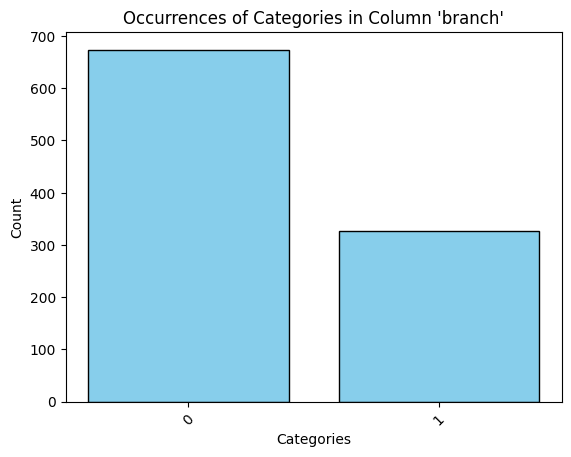

In [8]:
import matplotlib.pyplot as plt

def make_bar_plot(dataframe, column_name):

    category_counts = dataframe[column_name].value_counts()

    category_counts.index = category_counts.index.astype(str)

    categories = category_counts.index
    counts = category_counts.values

    plt.bar(categories, counts, color='skyblue', edgecolor='black')

    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.title(f'Occurrences of Categories in Column \'{column_name}\'')

    plt.xticks(rotation=45)

    plt.show()

make_bar_plot(ds, "branch")



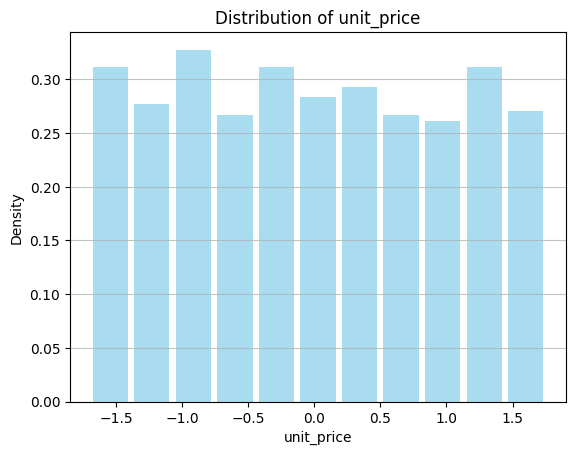

In [9]:
import matplotlib.pyplot as plt

def make_hist_plot(dataframe, column_name):

    if column_name not in dataframe.columns:
        print(f"Column '{column_name}' not found in DataFrame.")
        return

    plt.hist(dataframe[column_name], bins='auto', color='skyblue', alpha=0.7, rwidth=0.85, density=True)

    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.grid(axis='y', alpha=0.75)

    plt.show()

make_hist_plot(ds, "unit_price")


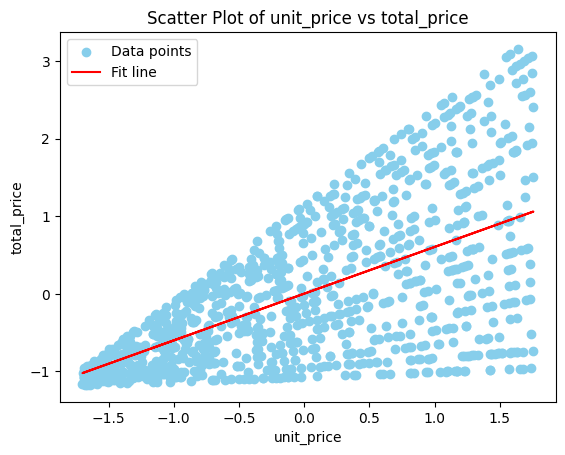

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def make_scatter_plot(dataframe, x_column, y_column=None, fit_line=True):

    if x_column not in dataframe.columns:
        print(f"Column '{x_column}' not found in DataFrame.")
        return
    if y_column is not None and y_column not in dataframe.columns:
        print(f"Column '{y_column}' not found in DataFrame.")
        return

    x_values = dataframe[x_column]
    y_values = dataframe[y_column] if y_column else dataframe.index

    plt.scatter(x_values, y_values, label='Data points', color='skyblue')

    if fit_line and y_column is not None:
        slope, intercept = np.polyfit(x_values, y_values, deg=1)
        fit_line_values = slope * x_values + intercept
        plt.plot(x_values, fit_line_values, label='Fit line', color='red')

    plt.title(f'Scatter Plot of {x_column} vs {y_column if y_column else "Index"}')
    plt.xlabel(x_column)
    plt.ylabel(y_column if y_column else 'Index')
    plt.legend()

    plt.show()

make_scatter_plot(ds, 'unit_price', 'total_price')


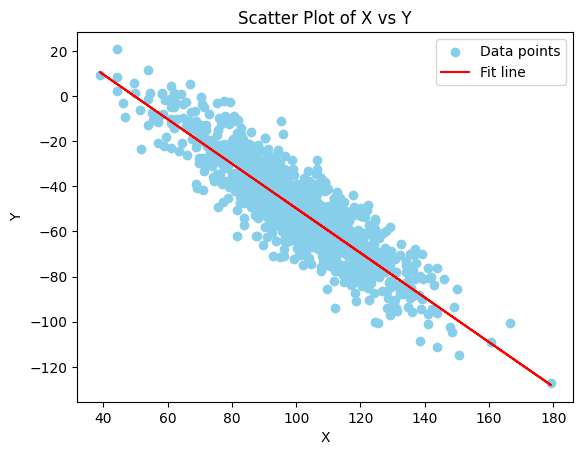

In [11]:
import numpy as np
import pandas as pd

def make_scatter_plot(dataframe, x_column, y_column=None, fit_line=True):

    if x_column not in dataframe.columns:
        print(f"Column '{x_column}' not found in DataFrame.")
        return
    if y_column is not None and y_column not in dataframe.columns:
        print(f"Column '{y_column}' not found in DataFrame.")
        return

    x_values = dataframe[x_column]
    y_values = dataframe[y_column] if y_column else dataframe.index

    plt.scatter(x_values, y_values, label='Data points', color='skyblue')

    if fit_line and y_column is not None:
        slope, intercept = np.polyfit(x_values, y_values, deg=1)
        fit_line_values = slope * x_values + intercept
        plt.plot(x_values, fit_line_values, label='Fit line', color='red')

    plt.title(f'Scatter Plot of {x_column} vs {y_column if y_column else "Index"}')
    plt.xlabel(x_column)
    plt.ylabel(y_column if y_column else 'Index')
    plt.legend()
    plt.show()

num_points = 100
np.random.seed(0)
data1 = 20 * np.random.randn(1000) + 100
data2 = data1 + (10 * np.random.randn(1000) + 50)
positive_corr_df = pd.DataFrame({'X': data1, 'Y': data2})

np.random.seed(1)
data1 = 20 * np.random.randn(1000) + 100
data2 = (10 * np.random.randn(1000) + 50) - data1
negative_corr_df = pd.DataFrame({'X': data1, 'Y': data2})

np.random.seed(2)
no_corr_df = pd.DataFrame({'X': np.random.randn(num_points), 'Y': np.random.randn(num_points)})

make_scatter_plot(negative_corr_df, x_column='X', y_column='Y', fit_line=True)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = ds.drop(columns=['total_price'])
y = ds['total_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 0.0003700813406734954
Mean Squared Error: 1.7974783261660306e-07
R² Score: 0.9999998398671857


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

X = ds[['quantity', 'unit_price']]
y = ds['total_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 0.29890132132062425
Mean Squared Error: 0.14780132172881438
R² Score: 0.8683275271789843


In [14]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

def train_svm(ds, features, target, config):
    X = ds[features].to_numpy()
    y = ds[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=config["test_size"], random_state=config["seed"])

    model = SVC(kernel=config["kernel"], C=config["C"], gamma=config["gamma"], max_iter=config["max_iter"])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    return model

ds['total_price_class'] = pd.cut(ds['total_price'], bins=3, labels=[0, 1, 2])

svm_config = {
    "test_size": 0.3,
    "seed": 42,
    "kernel": "linear",
    "C": 1.0,
    "gamma": "scale",
    "max_iter": -1,
}

svm_model = train_svm(ds, ['quantity', 'unit_price'], 'total_price_class', svm_config)


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       200
           1       0.90      0.90      0.90        70
           2       1.00      0.97      0.98        30

    accuracy                           0.95       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [15]:
from sklearn.tree import DecisionTreeClassifier

def train_decision_tree(ds, features, target, config):
    X = ds[features].to_numpy()
    y = ds[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=config["test_size"], random_state=config["seed"])

    model = DecisionTreeClassifier(max_depth=config["max_depth"], random_state=config["seed"])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    return model

dt_config = {
    "test_size": 0.3,
    "seed": 42,
    "max_depth": 5,
}

dt_model = train_decision_tree(ds, ['quantity', 'unit_price'], 'total_price_class', dt_config)


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       200
           1       0.80      0.96      0.87        70
           2       1.00      0.63      0.78        30

    accuracy                           0.93       300
   macro avg       0.93      0.85      0.87       300
weighted avg       0.94      0.93      0.93       300



In [16]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score

def kfold_cross_validation(model, X, y, K=5, scoring="accuracy"):
    cv = KFold(n_splits=K, random_state=1, shuffle=True)
    scores = cross_val_score(model, X, y, scoring=scoring, cv=cv, n_jobs=-1)
    print(f"{K}-fold Cross-Validation {scoring}:")
    print(f"Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

ds['category'] = pd.cut(ds['total_price'], bins=3, labels=[0, 1, 2])

X = ds[['quantity', 'unit_price']].to_numpy()
y = ds['category']

kfold_cross_validation(SVC(kernel="linear", C=1.0, gamma="scale"), X, y)


5-fold Cross-Validation accuracy:
Mean: 0.9460, Std: 0.0150


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['branch', 'city', 'customer_type', 'gender', 'product_name', 'product_category']
label_encoders = {}
processed_data = ds.copy()

for col in categorical_columns:
    le = LabelEncoder()
    processed_data[col] = le.fit_transform(processed_data[col])
    label_encoders[col] = le

classification_features = ['branch', 'city', 'gender', 'unit_price', 'quantity', 'reward_points']
classification_target = 'customer_type'

X = processed_data[classification_features]
y = processed_data[classification_target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred))

parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}
grid = GridSearchCV(SVC(random_state=42), parameters, scoring="accuracy", cv=5)
grid.fit(X_train, y_train)

print("Best SVM Parameters from Grid Search:")
print(grid.best_params_)
print("Grid Search Classification Report:")
print(classification_report(y_test, grid.best_estimator_.predict(X_test)))


SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       108
           1       0.94      1.00      0.97        92

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200

Best SVM Parameters from Grid Search:
{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Grid Search Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       108
           1       0.95      1.00      0.97        92

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200



In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import LabelEncoder

categorical_columns = ['branch', 'city', 'customer_type', 'gender', 'product_name', 'product_category']
label_encoders = {}
processed_data = ds.copy()

for col in categorical_columns:
    le = LabelEncoder()
    processed_data[col] = le.fit_transform(processed_data[col])
    label_encoders[col] = le

regression_features = ['branch', 'city', 'gender', 'product_category', 'unit_price', 'quantity', 'tax']
regression_target = 'total_price'

X = processed_data[regression_features]
y = processed_data[regression_target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)
cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-cv_scores.mean()}")

y_pred = dt_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Decision Tree Regression MSE: {mse}")



params = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 10, 20],
    'max_leaf_nodes': [10, 50, 100]
}
grid_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), params, scoring='neg_mean_squared_error', cv=5)
grid_dt.fit(X_train, y_train)
print(f"Best Decision Tree Parameters: {grid_dt.best_params_}")
print(f"Best Cross-Validated MSE: {-grid_dt.best_score_}")


Cross-validated MSE: 0.00019469203348220946
Decision Tree Regression MSE: 0.00026023691259420063
Best Decision Tree Parameters: {'max_depth': 10, 'max_leaf_nodes': 100, 'min_samples_split': 2}
Best Cross-Validated MSE: 0.00034000261440711774
